In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, MAX_SAMPLES

In [3]:
fontsize = 14
entity_name = "sketchy-opts"
project_name1 = "linear_convergence_inducing_krr_v2"

In [4]:
x_axis = "time"
x_axis2 = "datapasses"
save_dir = "./plots/synthetic"
metric = "train_loss"

In [5]:
runs_inducing_krr = get_project_runs(entity_name, project_name1)

In [6]:
set_fontsize(fontsize)

# Render plots in LaTeX
render_in_latex()

In [7]:
falkon_criteria = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precond": lambda run: run.config["precond_params"]["type"] == "falkon",
}
sketchy_criteria = {
    "optimizer": lambda run: run.config["opt"].startswith("sketchy"),
}

In [8]:
falkon_run = filter_runs(runs_inducing_krr, falkon_criteria)
sketchy_runs = filter_runs(runs_inducing_krr, sketchy_criteria)

all_runs = sketchy_runs

In [9]:
# Get final training loss from Falkon
falkon_train_loss = falkon_run[0].summary["train_loss"]

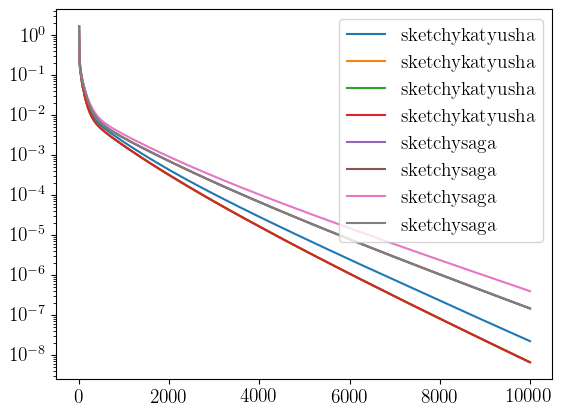

In [10]:
# Plot suboptimality for sketchy methods when compared to Falkon
for run in all_runs:
    y_df = run.history(samples = MAX_SAMPLES, keys=[metric])
    y = y_df[metric].values

    plt.semilogy((y - falkon_train_loss) / falkon_train_loss, label=run.config["opt"])
    plt.legend()